In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.4 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import keras
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split,cross_val_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import math
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
%matplotlib inline
sns.set()


In [ ]:
np.random.seed(25)

In [ ]:
Train = pd.read_csv('/content/Train_trailblazers.csv')
Test = pd.read_csv('/content/Test_trailblazers.csv')
sample_sub = pd.read_csv('/content/SampleSubmission_Trailblazers.csv')
var_def = pd.read_csv('/content/variable_descriptions.csv')


In [ ]:
pd.set_option('display.max_colwidth', 200)
var_def

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apartment in a block of flats,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house in complex,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (semi-detached house in a complex),NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached house,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/room in backyard,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwelling (shack,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwelling (shack,not in backyard,e.g. in an informal/squatter settlement or on a farm)
9,dw_09,Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat,NaN,NaN


In [ ]:
Train

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,34503001: Ward 1,3261.68067,11551.56486,6.393480,0.874972,0.003146,0.017230,0.004735,0.048888,0.000654,...,0.000472,0.000472,0.000000,0.006203,0,0,ZA3453001,-27.675590,23.057920,9.118927
2818,34503002: Ward 2,1463.06432,7908.90411,15.668000,0.636235,0.002262,0.010433,0.000000,0.003030,0.000000,...,0.003030,0.000713,0.000000,0.008414,0,0,ZA3453002,-27.591408,22.907161,1.697395
2819,34503003: Ward 3,1395.18881,6242.37527,13.238795,0.855975,0.006601,0.061118,0.000812,0.003912,0.000812,...,0.002150,0.001458,0.000000,0.003670,0,0,ZA3453003,-27.952550,22.749698,2.792501
2820,34503004: Ward 4,1679.66964,8014.73089,17.639523,0.792552,0.004423,0.016099,0.000000,0.000674,0.000000,...,0.009235,0.007870,0.000000,0.004803,0,0,ZA3453004,-27.913875,22.755314,2.793699


###EDA/FEATURE ENGINEERING

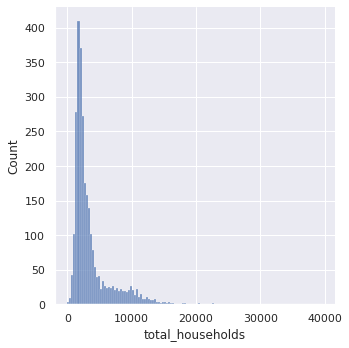

In [ ]:
sns.displot(x=Train['total_households'])

In [ ]:
Train_quant = Train[Train['total_households']>Train['total_households'].quantile(0.99)]

There are outliers in the Total_Household columns, which equals about 29 rows, considering the data is small, i dont think it's wise to delete the outliers

In [ ]:
Test_quant = Test[Test['total_households']>Test['total_households'].quantile(0.99)]

In [ ]:
Train.columns

Index(['ward', 'total_households', 'total_individuals', 'target', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01',
       'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01',
       'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'pw_07', 'pw_08', 'ADM4_PCODE', 'lat', 'lon', 'NL'],
      dtype='object')

In [ ]:
def num_of_outliers(Train):
  num_col = Train.select_dtypes(include=['float64']).columns
  for col in (num_col):
    num_of_outliers = Train[Train[col]>Train[col].quantile(0.99)].shape[0]
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    sns.histplot(x = Train[col])
    fig.text(0.1, 0.95, f'There are {num_of_outliers} outlier rows in {col} column', fontsize=16, fontweight='bold', fontfamily='serif')
    plt.xlabel(' ', fontsize=20)
    plt.ylabel('')
    plt.yticks(fontsize=13)
    plt.box(False)

In [ ]:
#num_of_outliers(Train)

In [ ]:
#num_of_outliers(Test)

In [ ]:
# def calc_skew(Train):
#   num_col = Train.select_dtypes(include=['float64']).columns
#   new_train = Train.copy()
#   for col in num_col:
#     if Train[col].skew() > 2.0:
#       new_train[col] = stats.boxcox(1+new_train[col])[0]
#   return new_train

In [ ]:
# new_train = calc_skew(Train_cap)
# Test = calc_skew(Test_cap)

In [ ]:
# T1_skew = Train_cap.skew(numeric_only=True)
# T2_skew = new_train.skew(numeric_only=True)

In [ ]:
# Te1_skew = Test_cap.skew(numeric_only=True)
# Te2_skew = Test.skew(numeric_only=True)

In [ ]:
# frame = {'Original_data_skew':T1_skew,'Applied_transformation_skew':T2_skew}
# data = pd.DataFrame(frame)

In [ ]:
# frame2 = {'Original_data_skew':Te1_skew,'Applied_transformation_skew':Te2_skew}
# data2 = pd.DataFrame(frame)

In [ ]:
Train[['dw_12','dw_13','lan_13','pw_07','pw_08']]

,dw_12,dw_13,lan_13,pw_07,pw_08
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2817,0,0,0,0,0
2818,0,0,0,0,0
2819,0,0,0,0,0
2820,0,0,0,0,0


In [ ]:
Train.drop(['dw_12','dw_13','lan_13','pw_07','pw_08'],axis=1,inplace=True)
Test.drop(['dw_12','dw_13','lan_13','pw_07','pw_08'],axis=1,inplace=True)

In [ ]:
Train['zone'] = Train['lon'] - Train['lat']
Train['zone2'] = Train['lon'] + Train['lat']
Test['zone'] = Test['lon'] - Test['lat']
Test['zone2'] = Test['lon'] + Test['lat']
Train['Family'] = Train['total_individuals'] / Train['total_households']
Test['Family'] = Test['total_individuals'] / Test['total_households']


In [ ]:
#Train["geom"] = Train["lat"].map(str) + ', ' + Train['lon'].map(str)
#Test["geom"] = Test["lat"].map(str) + ', ' + Test['lon'].map(str)

In [ ]:
#locator = Nominatim(user_agent="MyApp", timeout=5)
#rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.00001)



In [ ]:
#from tqdm._tqdm_notebook import tqdm_notebook
#tqdm_notebook.pandas()
#Train['address'] = Train['geom'].progress_apply(rgeocode)
#Train['city'] = Train.progress_apply(lambda x: x.address.raw['address'].get('city'),axis=1)
#Train['state'] = Train.progress_apply(lambda x:x.address.raw['address'].get('state'),axis=1)

In [ ]:
#tqdm_notebook.pandas()
#Test['address'] = Test['geom'].progress_apply(rgeocode)
#Test['city'] = Test.progress_apply(lambda x: x.address.raw['address'].get('city'),axis=1)
#Test['state'] = Test.progress_apply(lambda x:x.address.raw['address'].get('state'),axis=1)

In [ ]:
#Train['city_count_per_state'] = Train.groupby(['state'])['city'].transform('nunique')
#Test['city_count_per_state'] = Test.groupby(['state'])['city'].transform('nunique')


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#cat_cols = ['city','state']
#for col in cat_cols:
  #Train[col] = le.fit_transform(Train[col])
  #Test[col] = le.fit_transform(Test[col])

In [ ]:
#Train.drop(['geom','address'],axis=1,inplace=True)
#Test.drop(['geom','address'],axis=1,inplace=True)

In [ ]:
correlations = Train.corr()['target'].sort_values()
correlations.tail(30)

psa_02   -0.097613
lan_07   -0.046968
Family   -0.039266
lan_06   -0.038563
lan_02   -0.020163
lan_08   -0.003930
dw_00     0.018461
lan_09    0.066230
lan_10    0.106548
pw_01     0.113646
lat       0.120381
zone      0.194206
psa_04    0.203999
lan_11    0.210597
lan_04    0.232266
lan_05    0.275263
zone2     0.329304
lon       0.347088
pw_05     0.349653
pw_04     0.389467
pw_03     0.440941
pw_02     0.442441
dw_01     0.458206
pw_06     0.470676
pg_00     0.613346
lln_01    0.637835
stv_01    0.664181
car_01    0.702831
psa_00    0.782472
target    1.000000
Name: target, dtype: float64

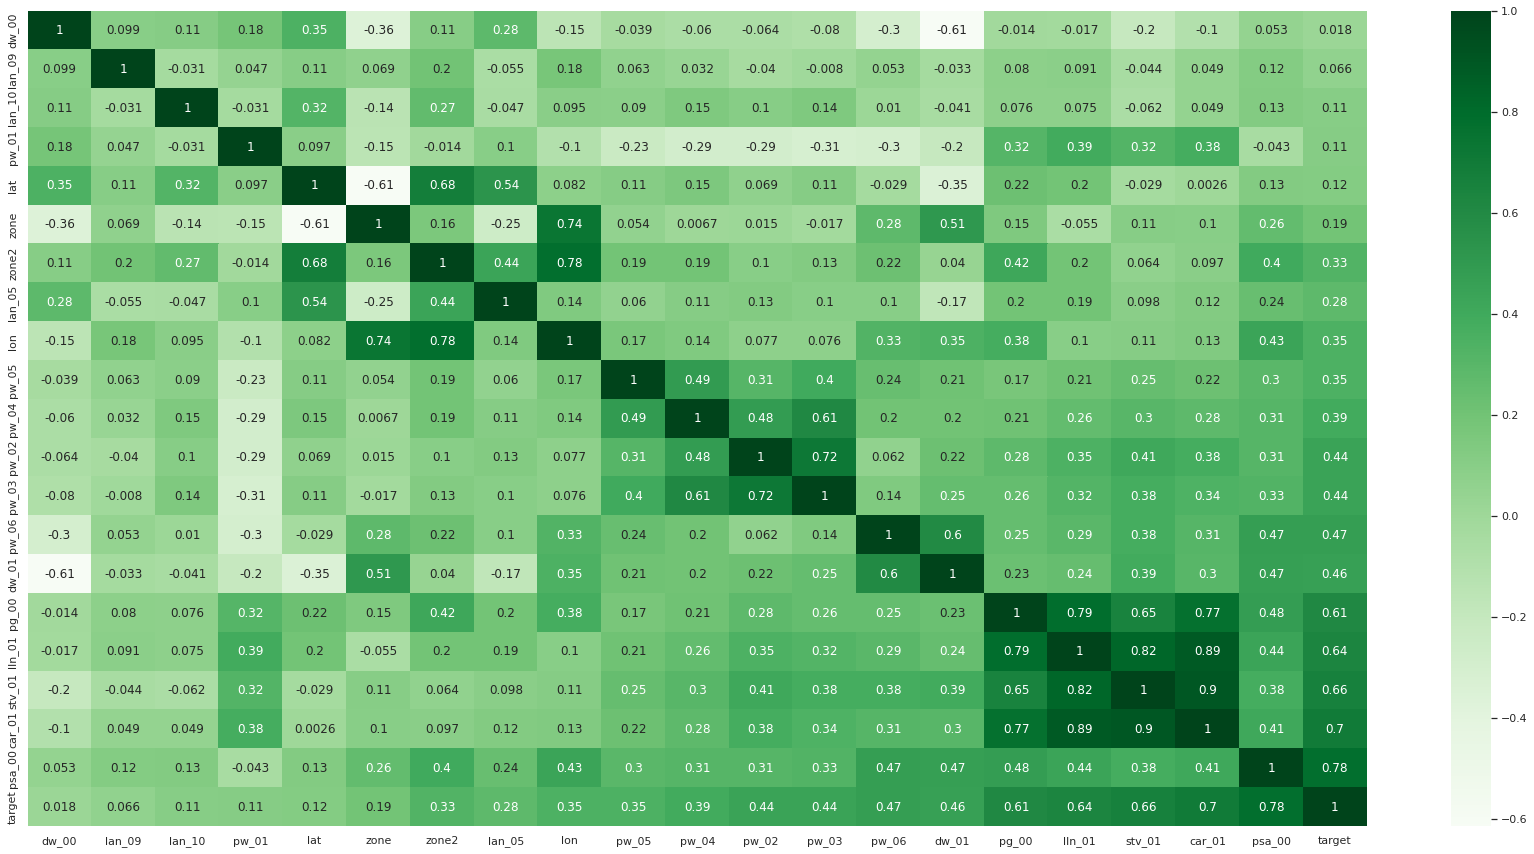

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(30,15))
sns.heatmap(Train[['dw_00','lan_09','lan_10','pw_01','lat','zone','zone2','lan_05','lon','pw_05','pw_04','pw_02','pw_03','pw_06','dw_01','pg_00','lln_01','stv_01','car_01','psa_00','target']].corr(), cmap='Greens',annot=True)


* Zone and Lan_04 have a high correlation of 0.79 does that mean people who speak 
the IsiZulu language are most likely concentrated in a particular region. Does that mean certain languages are highely concentrated in certain cities or states

* Avg_diff_prod, avg_individuals, diff_total_hh_id are highly correlated, are those other columns really needed? what other features can be engineered from them?
* pg_00 and lln_01 have a high correlation of 0.79, meaning most black africans do not have ownership of landline, how does it relate to the target?
* lln_01 has a high correlation of 0.83 and 0.9 with stv_01 and car_01 does it mean people who cant afford ownership of landline most often than not cant afford cars, or satelite TV, the level of poverty must be quite high there








###FEATURE ENGINEERING AND PREPROCESSING

In [ ]:
Train['tag'] = 'train'
Test['tag'] = 'test'
data = pd.concat([Train,Test]).reset_index(drop=True)

In [ ]:
min_max_scaler = MinMaxScaler()
data['scaled_total_households'] = min_max_scaler.fit_transform(data['total_households'].values.reshape(-1,1))
data  = data.drop('total_households', axis=1)
data['scaled_total_individuals'] = min_max_scaler.fit_transform(data['total_individuals'].values.reshape(-1,1))
data  = data.drop('total_individuals', axis=1)

In [ ]:
num_cols = data.select_dtypes(include=['float64']).drop(['target','Family','lat','lon','Family','scaled_total_households', 'scaled_total_individuals','zone','zone2','NL'],axis=1).columns
data[num_cols] = min_max_scaler.fit_transform(data[num_cols])

In [ ]:
var_def.iloc[-1].values

array(['target',
       'Percentage of women head households with income under R19.6k out of total number of households',
       nan, nan], dtype=object)

In [ ]:
var_def[0:12].values

array([['dw_00',
        'Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm',
        nan, nan],
       ['dw_01',
        'Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials',
        nan, nan],
       ['dw_02',
        'Percentage of dwellings of type: Flat or apartment in a block of flats',
        nan, nan],
       ['dw_03',
        'Percentage of dwellings of type: Cluster house in complex', nan,
        nan],
       ['dw_04',
        'Percentage of dwellings of type: Townhouse (semi-detached house in a complex)',
        nan, nan],
       ['dw_05', 'Percentage of dwellings of type: Semi-detached house',
        nan, nan],
       ['dw_06',
        'Percentage of dwellings of type: House/flat/room in backyard',
        nan, nan],
       ['dw_07',
        'Percentage of dwellings of type: Informal dwelling (shack',
        ' in backyard)', nan],
       ['dw_08',
        'Per

In [ ]:
data[['dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06',
       'dw_07', 'dw_08', 'dw_09', 'dw_10', 'dw_11']].describe()

,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11
count,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000
mean,0.668778,0.135470,0.038093,0.020975,0.019881,0.015989,0.056974,0.081935,0.074584,0.022894,0.017040,0.008143
std,0.247862,0.241602,0.084872,0.065809,0.070290,0.057244,0.092240,0.123513,0.134095,0.055225,0.043131,0.022556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.523024,0.003014,0.002991,0.000000,0.000000,0.000000,0.007989,0.008641,0.002850,0.001203,0.000000,0.002110
50%,0.736443,0.011254,0.008989,0.003249,0.001665,0.001416,0.023241,0.032027,0.013477,0.006287,0.006086,0.004222
75%,0.867217,0.120374,0.037518,0.009877,0.006017,0.005952,0.063857,0.101967,0.080751,0.021830,0.016803,0.008235
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#data['house_scale_100'] = (data['dw_00'] + data['dw_03'] + data['dw_04'] + data['dw_05'] + data['dw_06'])
#data['shack_scale_100'] = (data['dw_07'] + data['dw_08'])
#data['Other_scale_100'] = (data['dw_01'] + data['dw_10'] + data['dw_11'])
#data['flat_in_backyard_scale_100'] = (data['dw_02'] + data['dw_06'] + data['dw_09'])

In [ ]:
# data['total_dw'] = data[['dw_00', 'dw_01']].sum(axis=1)
# data['max_dw'] = data[['dw_00', 'dw_01']].max(axis=1)
# data['min_dw'] = data[['dw_00', 'dw_01']].min(axis=1)


In [ ]:
# data[['total_dw','max_dw','min_dw','house_scale_100',
#        'shack_scale_100', 'Other_scale_100', 'flat_in_backyard_scale_100',
#        'total_house_scale','target']].describe()

In [ ]:
# dw_cols = ['total_dw','max_dw','min_dw','house_scale_100','shack_scale_100', 'Other_scale_100', 'flat_in_backyard_scale_100','total_house_scale']
# for num in dw_cols:
#   fig, ax = plt.subplots(1,1, figsize=(10,4))
#   sns.histplot(data[num])  
#   plt.xlabel(num)


In [ ]:
#data[['city_total_individuals_sum','city_total_house_scale_100']] = data.groupby('city')['total_individuals','house_scale_100'].transform('sum')

In [ ]:
#data['status']=np.where([(data['city_total_individuals_sum']<109270.2) & (data['city_total_house_scale_100']<1245.196466)], 'rural', 'urban').T


In [ ]:
#num_of_outliers(Train[['total_dw','max_dw','min_dw','target']])

In [ ]:
var_def[14:19].values

array([['psa_00',
        'Percentage listing present school attendance as:  Yes', nan,
        nan],
       ['psa_01', 'Percentage listing present school attendance as:  No',
        nan, nan],
       ['psa_02',
        'Percentage listing present school attendance as:  Do not know',
        nan, nan],
       ['psa_03',
        'Percentage listing present school attendance as:  Unspecified',
        nan, nan],
       ['psa_04',
        'Percentage listing present school attendance as:  Not applicable',
        nan, nan]], dtype=object)

In [ ]:
data[['psa_00', 'psa_01','psa_02', 'psa_03', 'psa_04']].describe()

,psa_00,psa_01,psa_02,psa_03,psa_04
count,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000
mean,0.550007,0.616719,0.027036,0.104115,0.098984
std,0.144169,0.105179,0.044317,0.079574,0.042129
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.438939,0.540296,0.006309,0.051810,0.079604
50%,0.528029,0.633757,0.016053,0.082525,0.095302
75%,0.666165,0.692920,0.032986,0.132033,0.110905
max,1.000000,1.000000,1.000000,1.000000,1.000000


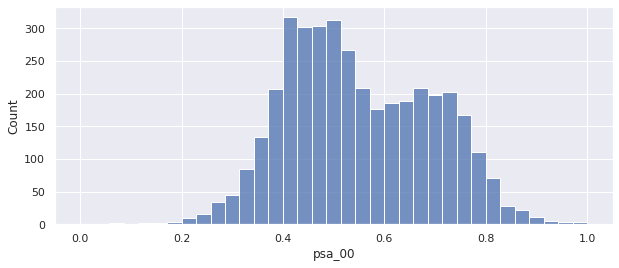

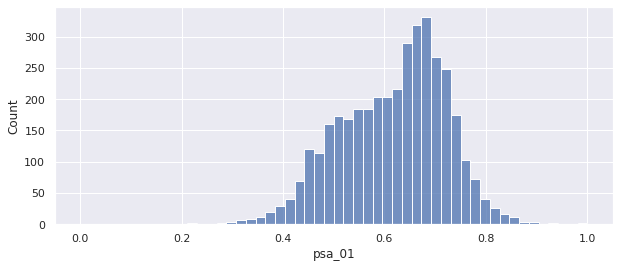

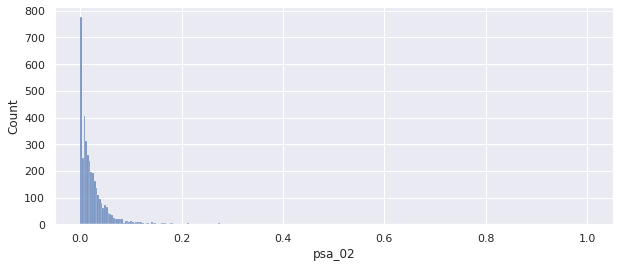

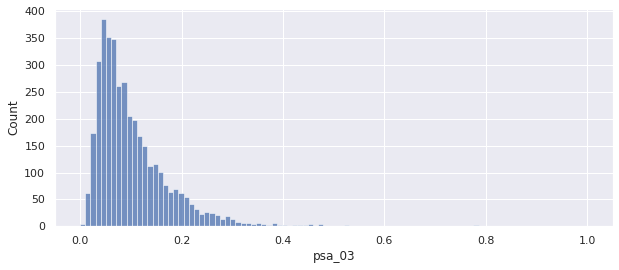

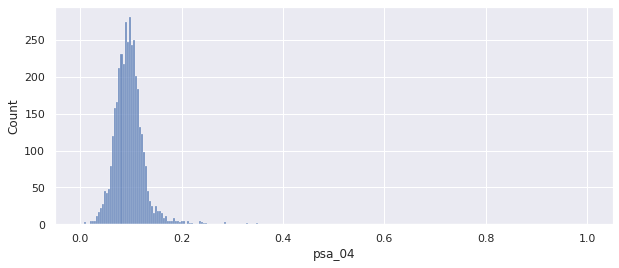

In [ ]:
dw_cols = ['psa_00', 'psa_01','psa_02', 'psa_03', 'psa_04']
for num in dw_cols:
  fig, ax = plt.subplots(1,1, figsize=(10,4))
  sns.histplot(data[num])  
  plt.xlabel(num)

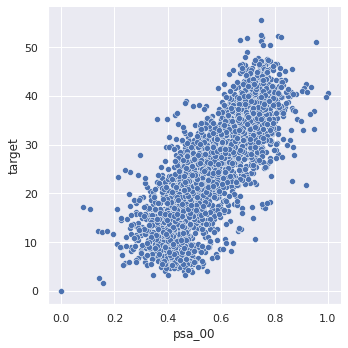

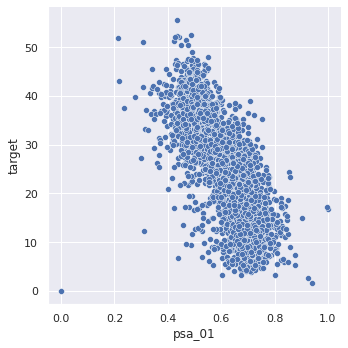

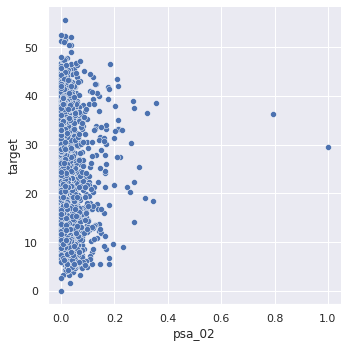

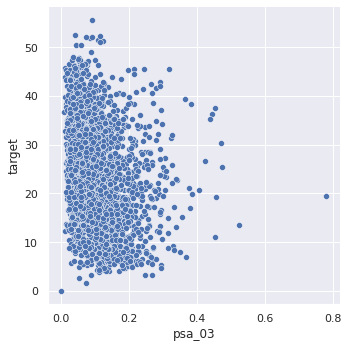

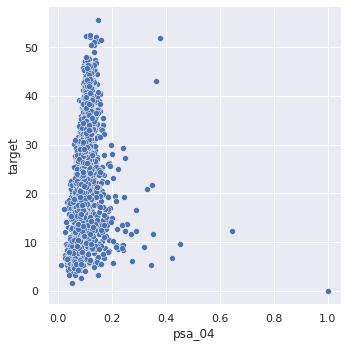

In [ ]:
psa_cols = ['psa_00', 'psa_01','psa_02', 'psa_03', 'psa_04']
for psa in psa_cols:
  ax = sns.relplot(
    data=data, x=psa, y="target",kind="scatter")

In [ ]:
data['total_psa_no'] = data[['psa_01','psa_02','psa_03','psa_04']].sum(axis=1)
data['diff_psa_scale_100'] = data['psa_00']/data['psa_01']
data['avg_individuals_with_psa_yes'] = data['psa_00'] * data['Family']
data['avg_individuals_with_psa_no'] = data['total_psa_no'] * data['Family']
data['diff_family_psa_scale_100'] = data['avg_individuals_with_psa_yes']/data['avg_individuals_with_psa_no']

In [ ]:
data[['total_psa_no','diff_psa_scale_100','avg_individuals_with_psa_yes','avg_individuals_with_psa_no','diff_family_psa_scale_100']].describe()

,total_psa_no,diff_psa_scale_100,avg_individuals_with_psa_yes,avg_individuals_with_psa_no,diff_family_psa_scale_100
count,3835.000000,3834.000000,3835.000000,3835.000000,3835.000000
mean,0.846853,0.961914,2.191281,4.224958,0.687203
std,0.128244,0.439792,1.032090,62.397527,0.275879
min,0.526396,0.081127,0.000000,1.328969,0.000000
25%,0.746748,0.637903,1.505682,2.765855,0.465631
50%,0.845824,0.823897,1.961790,3.076860,0.621765
75%,0.935464,1.227477,2.732566,3.498349,0.887341
max,1.696770,3.647560,24.887189,3867.000000,1.893184


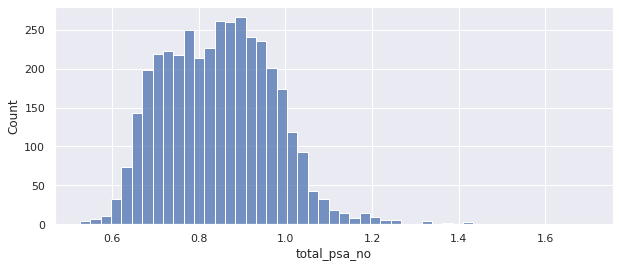

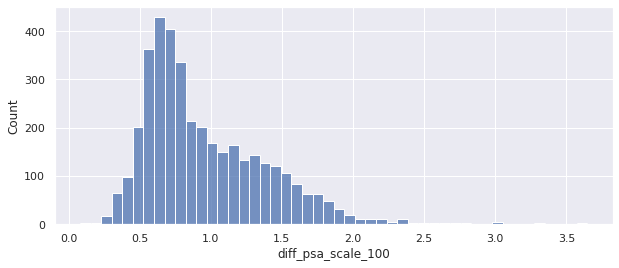

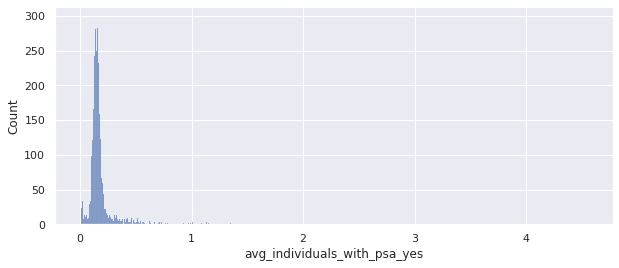

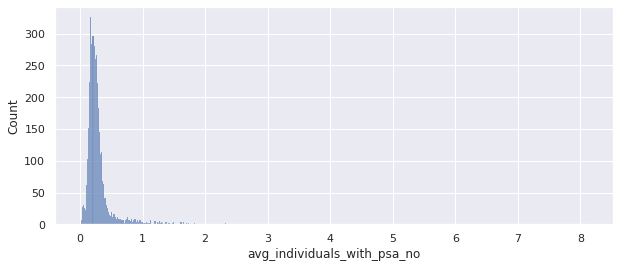

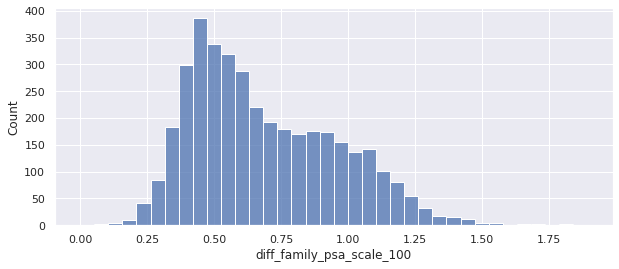

In [ ]:
dw_cols = ['total_psa_no','diff_psa_scale_100','avg_individuals_with_psa_yes','avg_individuals_with_psa_no','diff_family_psa_scale_100']
for num in dw_cols:
  fig, ax = plt.subplots(1,1, figsize=(10,4))
  sns.histplot(data[num])  
  plt.xlabel(num)

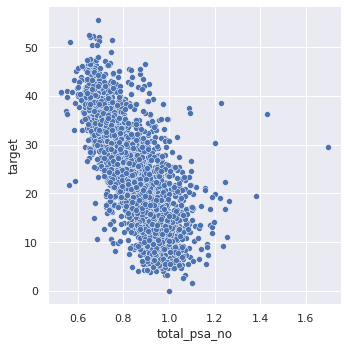

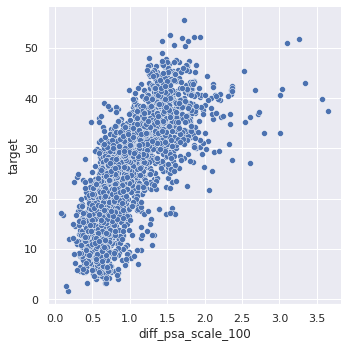

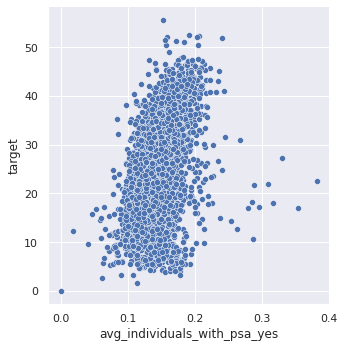

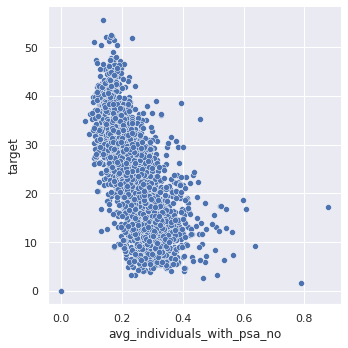

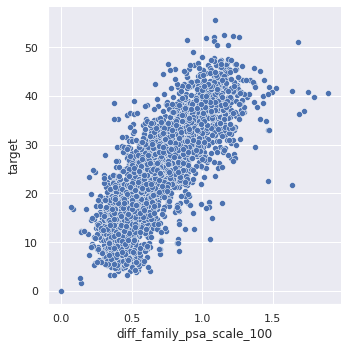

In [ ]:
psa_cols = ['total_psa_no','diff_psa_scale_100','avg_individuals_with_psa_yes','avg_individuals_with_psa_no','diff_family_psa_scale_100']
for psa in psa_cols:
  ax = sns.relplot(
    data=data, x=psa, y="target",kind="scatter")

In [ ]:
var_def[25:40]

,Column,Description,Unnamed: 2,Unnamed: 3
25,lan_00,Percentage listing language as: Afrikaans,NaN,NaN
26,lan_01,Percentage listing language as: English,NaN,NaN
27,lan_02,Percentage listing language as: IsiNdebele,NaN,NaN
28,lan_03,Percentage listing language as: IsiXhosa,NaN,NaN
29,lan_04,Percentage listing language as: IsiZulu,NaN,NaN
30,lan_05,Percentage listing language as: Sepedi,NaN,NaN
31,lan_06,Percentage listing language as: Sesotho,NaN,NaN
32,lan_07,Percentage listing language as: Setswana,NaN,NaN
33,lan_08,Percentage listing language as: Sign language,NaN,NaN
34,lan_09,Percentage listing language as: SiSwati,NaN,NaN


In [ ]:
data[['lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'lan_14']].describe()

,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14
count,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000
mean,0.149436,0.067023,0.024802,0.183353,0.213335,0.088282,0.087025,0.100589,0.139601,0.018337,0.018329,0.040250,0.032119,0.016493
std,0.271556,0.134298,0.086784,0.326376,0.343360,0.229649,0.201016,0.239364,0.130133,0.103157,0.110156,0.141950,0.054142,0.046485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003493,0.011605,0.002267,0.002878,0.003910,0.001393,0.002420,0.002606,0.052880,0.000173,0.000236,0.000215,0.005755,0.000000
50%,0.009148,0.020838,0.006228,0.018205,0.015397,0.002719,0.008307,0.005649,0.097510,0.000663,0.000761,0.001236,0.015712,0.000281
75%,0.123473,0.044290,0.013681,0.124901,0.259518,0.022163,0.047469,0.024401,0.186119,0.003343,0.003099,0.013984,0.034793,0.013638
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data['max_lan'] = data[['lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'lan_14']].max(axis=1)

In [ ]:
# lan_cols = ['lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
#        'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
#        'lan_12', 'lan_14','max_lan']
# for num in lan_cols:
#   fig, ax = plt.subplots(1,1, figsize=(10,4))
#   sns.histplot(data[num])  
#   plt.xlabel(num)

In [ ]:
# lan_cols = ['lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
#        'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
#        'lan_12', 'lan_14','max_lan']
# for lan in lan_cols:
#   ax = sns.relplot(
#     data=data, x=lan, y="target",,kind="scatter")

In [ ]:
# lan_cols = ['lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
#        'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
#        'lan_12', 'lan_14','max_lan']
# for lan in lan_cols:
#   ax = sns.relplot(
#     data=data, x=lan,kind="scatter")

In [ ]:
#data[['count_lan_01','count_lan_00','count_lan_09','count_lan_10','count_lan_12','count_lan_06']] = data.groupby(['city','status'])['lan_01','lan_00','lan_09','lan_10','lan_12','lan_06'].transform('sum')

In [ ]:
# data['total_lan'] = data[['lan_01','lan_00','lan_09','lan_10','lan_12','lan_06']].sum(axis=1)
# data['mul_total_lan'] = data['lan_01'] * data['lan_00'] * data['lan_09'] * data['lan_10'] * data['lan_12'] * data['lan_06']
# data[['count_total_lan','max_lan']] = data.groupby(['city','status'])['total_lan','max_lan'].transform('sum')

In [ ]:
var_def[40:45]

,Column,Description,Unnamed: 2,Unnamed: 3
40,pg_00,Percentage in population group: Black African,NaN,NaN
41,pg_01,Percentage in population group: Coloured,NaN,NaN
42,pg_02,Percentage in population group: Indian or Asian,NaN,NaN
43,pg_03,Percentage in population group: White,NaN,NaN
44,pg_04,Percentage in population group: Other,NaN,NaN


In [ ]:
data[['pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04']].describe()


,pg_00,pg_01,pg_02,pg_03,pg_04
count,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000
mean,0.805867,0.095068,0.016059,0.084083,0.012110
std,0.313257,0.231046,0.071840,0.186363,0.029553
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.738767,0.001069,0.000874,0.000499,0.001804
50%,0.988318,0.003687,0.001864,0.001459,0.005123
75%,0.995640,0.020945,0.004939,0.054942,0.013680
max,1.000000,1.000000,1.000000,1.000000,1.000000


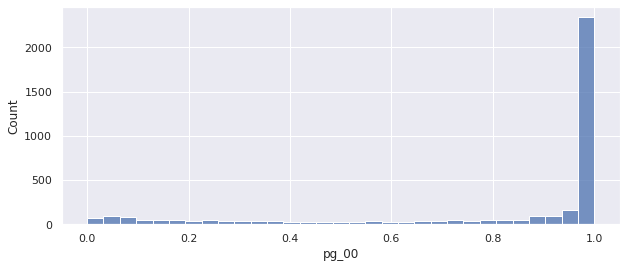

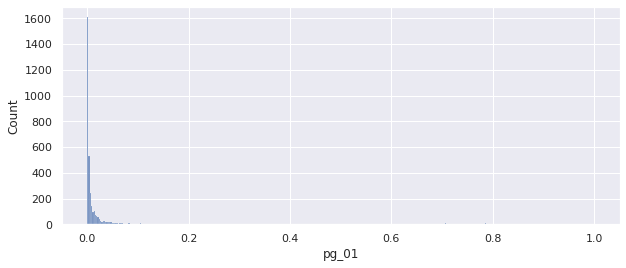

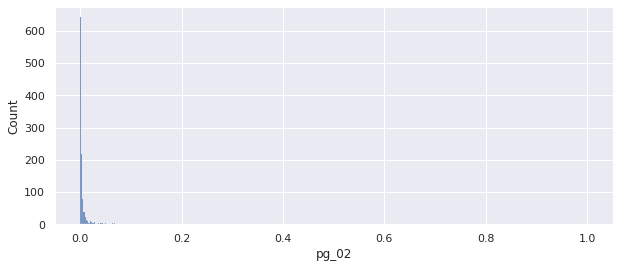

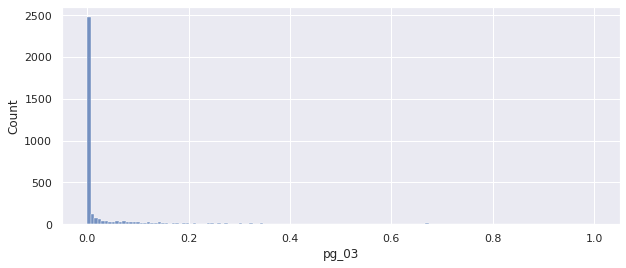

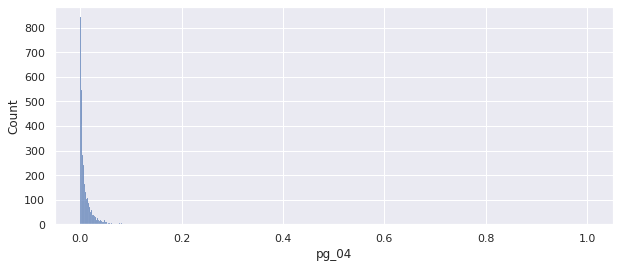

In [ ]:
pg_cols = ['pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04']
for pg in pg_cols:
  fig, ax = plt.subplots(1,1, figsize=(10,4))
  sns.histplot(data[pg])  
  plt.xlabel(pg)

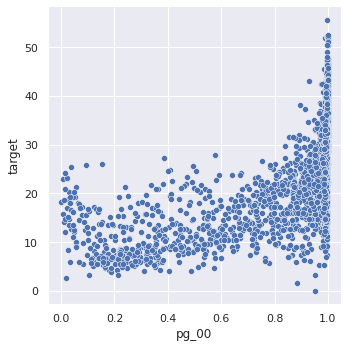

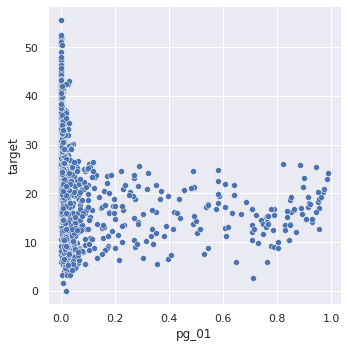

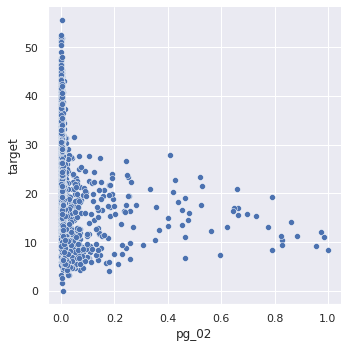

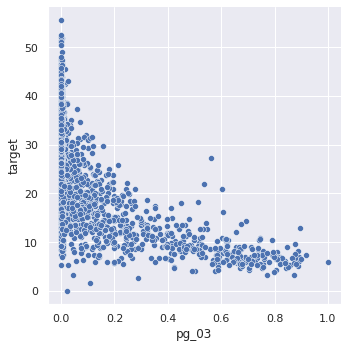

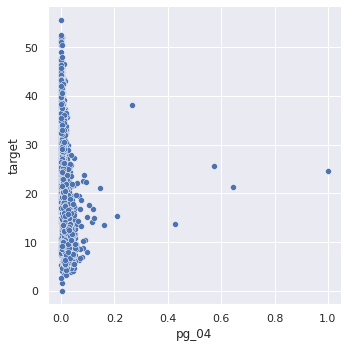

In [ ]:
pg_cols = ['pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04']
for pg in pg_cols:
  ax = sns.relplot(
    data=data, x=pg, y="target",kind="scatter")

* As the percentage of blacks across each states increases the percentage of women earning less than $19.6k annual income increases... seems like wards with higher percentage of black people have poorer female headed households unlike other races! investigate why does the presence of more blacks indicate poverty? what could be the reasons, check with other columns


In [ ]:
# data['avg_blacks'] = data['Family'] * data['pg_00']
# data['total_not_black'] = data[['pg_01','pg_02','pg_03','pg_04']].sum(axis=1)
# data['ratio_black_non_black'] = data['pg_00'] / data['total_not_black']
# data['avg_not_black'] = data['Family'] * data['total_not_black']
# data['ratio_family_black_non_black'] = data['avg_blacks']/data['avg_not_black']

In [ ]:
# avg_cols = ['avg_blacks','total_not_black','ratio_black_non_black','avg_not_black','ratio_family_black_non_black']
# for avg in avg_cols:
#   fig, ax = plt.subplots(1,1, figsize=(10,4))
#   sns.histplot(data[avg])  
#   plt.xlabel(avg)

In [ ]:
# avg_cols = ['avg_blacks','total_not_black','ratio_black_non_black','avg_not_black','ratio_family_black_non_black']
# for avg in avg_cols:
#   ax = sns.relplot(
#     data=data, x=avg, y="target",kind="scatter")

In [ ]:
var_def[46:55].values

array([['pw_00',
        'Percentage with piped water access:  Piped (tap) water inside dwelling/institution',
        nan, nan],
       ['pw_01',
        'Percentage with piped water access:  Piped (tap) water inside yard',
        nan, nan],
       ['pw_02',
        'Percentage with piped water access:  Piped (tap) water on community stand: distance less than 200m from dwelling/institution',
        nan, nan],
       ['pw_03',
        'Percentage with piped water access:  Piped (tap) water on community stand: distance between 200m and 500m from dwelling/institution',
        nan, nan],
       ['pw_04',
        'Percentage with piped water access:  Piped (tap) water on community stand: distance between 500m and 1000m (1km) from dwelling /institution',
        nan, nan],
       ['pw_05',
        'Percentage with piped water access:  Piped (tap) water on community stand: distance greater than 1000m (1km) from dwelling/institution',
        nan, nan],
       ['pw_06',
        'Percentage

In [ ]:
data[['pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06']].describe()

,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06
count,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000
mean,0.379645,0.298757,0.133695,0.112320,0.062735,0.047936,0.134984
std,0.327932,0.250826,0.164251,0.156033,0.104508,0.100891,0.229666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.071017,0.074247,0.007883,0.004987,0.002227,0.000619,0.005081
50%,0.297143,0.237011,0.068147,0.040582,0.015875,0.006097,0.023801
75%,0.660857,0.483338,0.198175,0.161146,0.081308,0.043364,0.137820
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# pw_cols = ['pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06']
# for pw in pw_cols:
#   fig, ax = plt.subplots(1,1, figsize=(10,4))
#   sns.histplot(data[pw])  
#   plt.xlabel(pw)

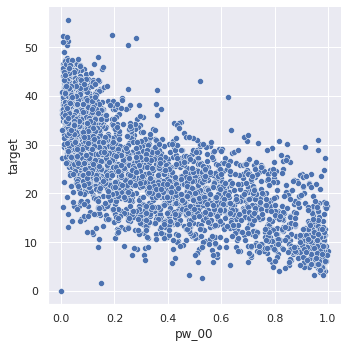

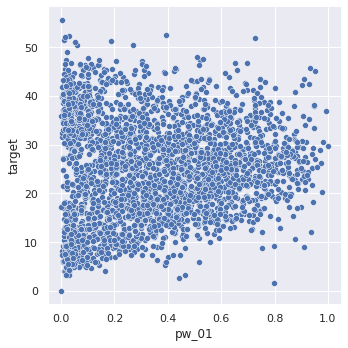

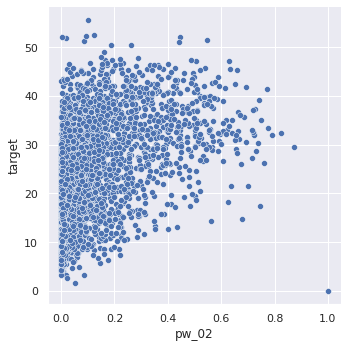

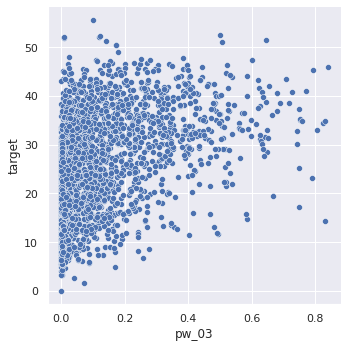

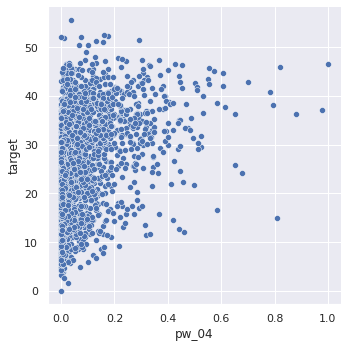

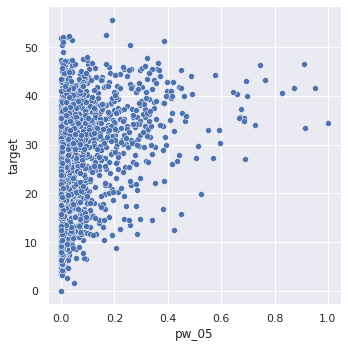

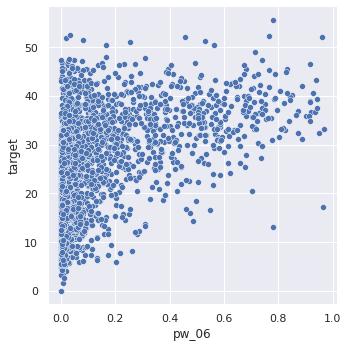

In [ ]:
pw_cols = ['pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06']
for pw in pw_cols:
  ax = sns.relplot(
    data=data, x=pw, y="target",kind="scatter")

* Those with access to piped water inside their dwelling or institution appear to have a correlation with the target... as the number increases the percentage of female households earning below R19.6k decreases...does it mean those with access to piped water inside their dwelling are rich, then what of the poor? they dont have easy access to piped water or they use another source of water?

* Those with access to piped water in their yard, or at a certain distance, or having no access to piped water at all  have a correlation with the target...as the number increases the percentage of female households earning below R19.6k increases.. does it mean those withlimited access to piped water are poor? it makes sense that maybe the dwellings the live or facilities are not well equiped for easy access to the water 

In [ ]:
#data['total_pw_no'] = data[['pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06']].sum(axis=1)

In [ ]:
# pw_cols = ['total_pw_no', 'max_pw_no', 'total+max_pw_no']
# for pw in pw_cols:
#   fig, ax = plt.subplots(1,1, figsize=(10,4))
#   sns.histplot(data[pw])  
#   plt.xlabel(pw)

In [ ]:
# pw_cols = ['total_pw_no', 'max_pw_no', 'total+max_pw_no']
# for pw in pw_cols:
#   ax = sns.relplot(
#     data=data, x=pw, y="target",kind="scatter")

In [ ]:
#data[['count_total_pw_no','count_max_pw_no']] = data.groupby(['city','status'])['total_pw_no','max_pw_no'].transform('sum')

In [ ]:
# data['diff_car_00'] = data['car_00']/data['car_01']
# data['diff_stv_00'] = data['stv_00']/data['stv_01']
# data['diff_lln_00'] = data['lln_00']/data['lln_01']


In [ ]:
# pw_cols = ['pg_00','lln_01', 'stv_01', 'car_01']
# for pw in pw_cols:
#   ax = sns.relplot(
#     data=data, x=pw, y="target",kind="scatter")

In [ ]:
# pw_cols = ['lln_00', 'stv_00', 'car_00']
# for pw in pw_cols:
#   ax = sns.relplot(
#     data=data, x=pw, y="target",kind="scatter")

Seems to be that the percentage of does who do not have has a stronger correlation to the target than does who have

In [ ]:
#data['total_lackers'] = data[['psa_01','stv_00','car_01']].sum(axis=1)
#data['total_gainers'] = data[['psa_00','stv_01','car_00']].sum(axis=1)

In [ ]:
data.columns

Index(['ward', 'target', 'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05',
       'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10', 'dw_11', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'ADM4_PCODE', 'lat', 'lon', 'NL', 'zone', 'zone2', 'Family',
       'tag', 'scaled_total_households', 'scaled_total_individuals',
       'total_psa_no', 'diff_psa_scale_100', 'avg_individuals_with_psa_yes',
       'avg_individuals_with_psa_no', 'diff_family_psa_scale_100', 'max_lan'],
      dtype='object')

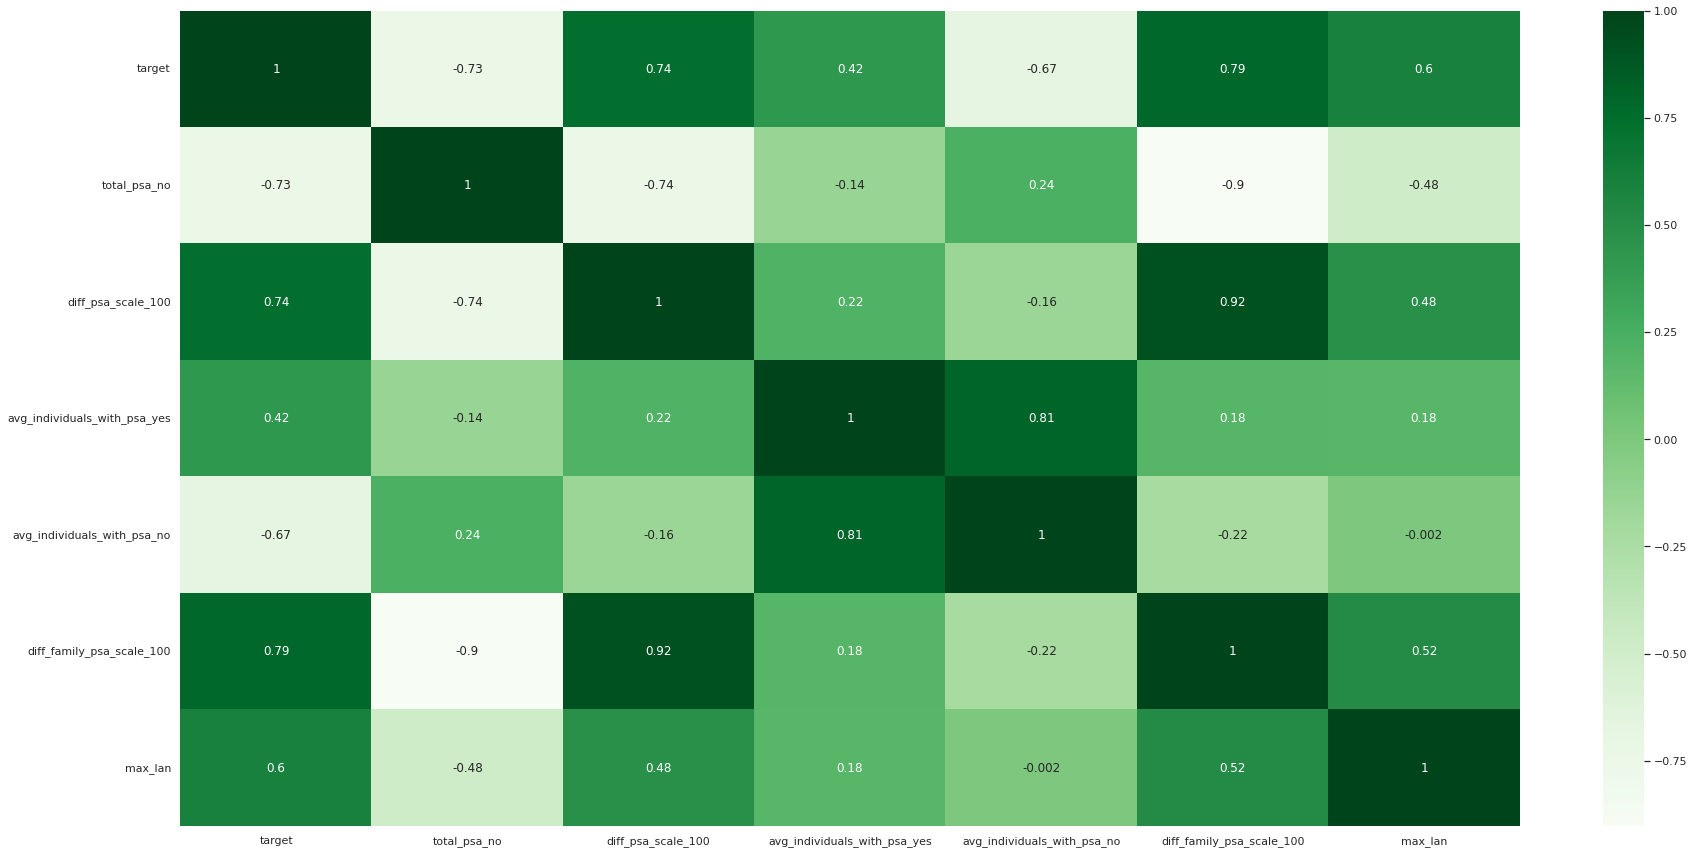

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(30,15))
sns.heatmap(data[['target','total_psa_no', 'diff_psa_scale_100', 'avg_individuals_with_psa_yes',
       'avg_individuals_with_psa_no', 'diff_family_psa_scale_100', 'max_lan']].corr(), cmap='Greens',annot=True)


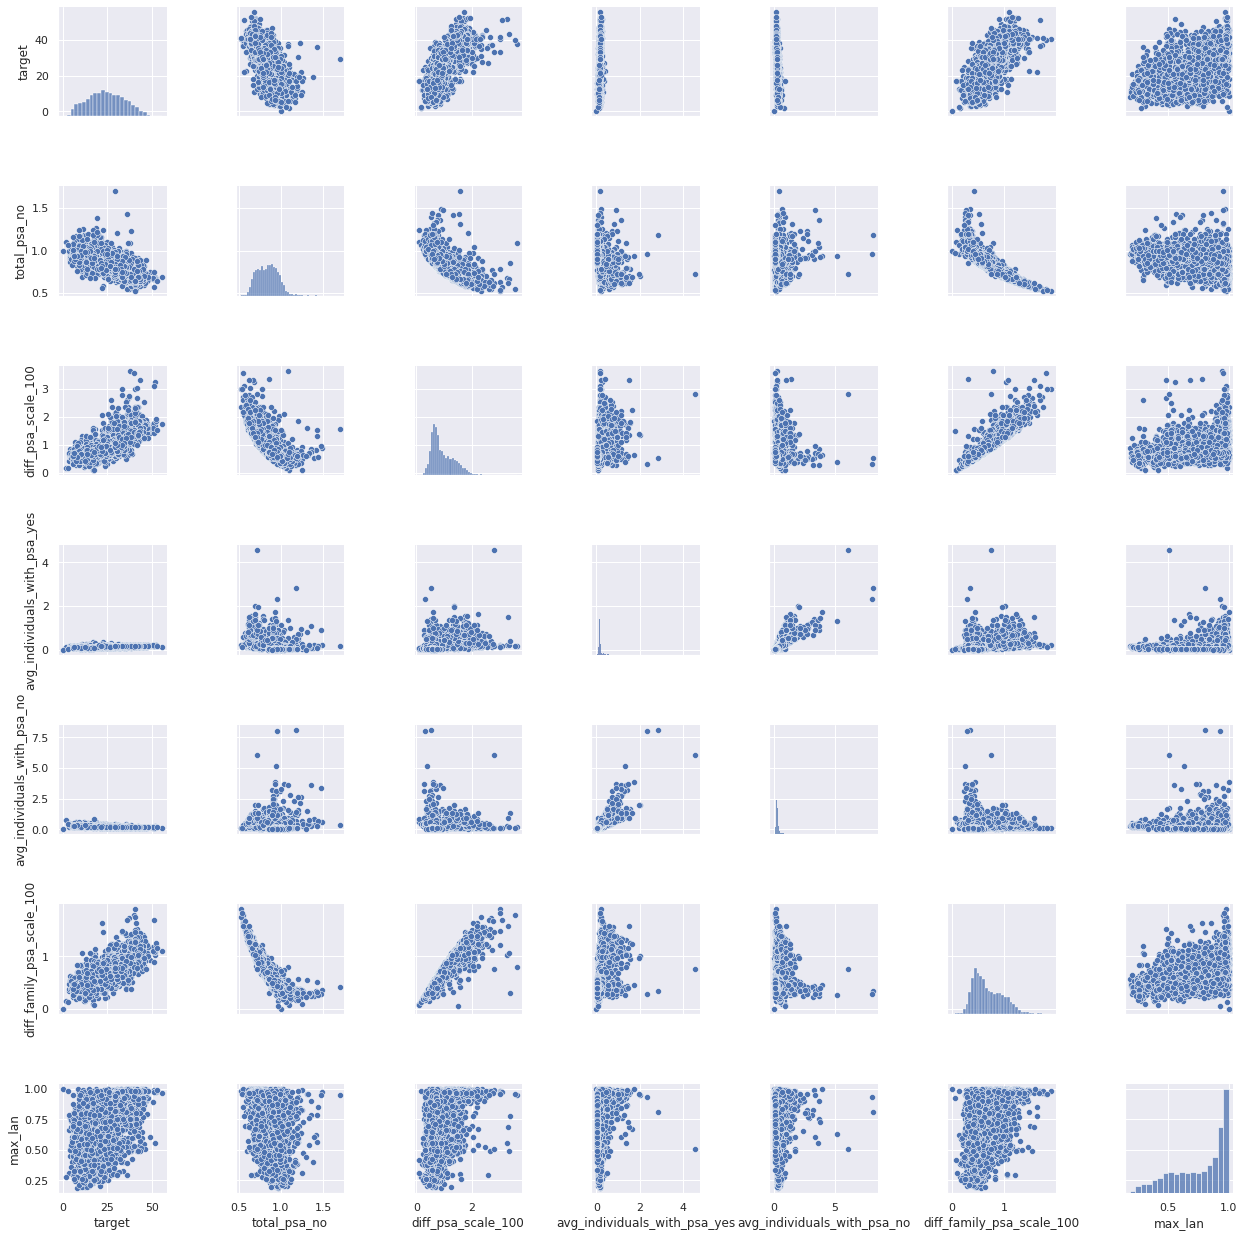

In [ ]:
sns.pairplot(data[['target','total_psa_no', 'diff_psa_scale_100', 'avg_individuals_with_psa_yes',
       'avg_individuals_with_psa_no', 'diff_family_psa_scale_100', 'max_lan']])

In [ ]:
def bearing_array(lat, lng):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lat - lng)
    lat, lng = map(np.radians, (lat, lng))
    y = np.sin(lng_delta_rad) * np.cos(lat)
    x = np.cos(lat) * np.sin(lat) - np.sin(lng) * np.cos(lng) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))
data['bearing'] = bearing_array(data['lat'].values, data['lon'].values)




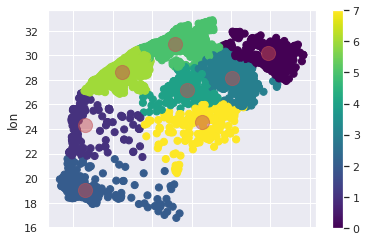

In [ ]:
from sklearn.cluster import KMeans
# Cluster Lat and Long 
kmeans = KMeans(n_clusters =8, init ='k-means++')
kmeans.fit(data[['lat','lon']])
data['cluster_label'] = kmeans.fit_predict(data[['lat','lon']])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(data[['lat','lon']])
# Full_data['cluster_label'].value_counts()
data.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=200, alpha=0.5)

In [ ]:

data.drop([1815],axis=0,inplace=True)
data[data['diff_psa_scale_100'].isnull()]

,ward,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,...,scaled_total_households,scaled_total_individuals,total_psa_no,diff_psa_scale_100,avg_individuals_with_psa_yes,avg_individuals_with_psa_no,diff_family_psa_scale_100,max_lan,bearing,cluster_label


In [ ]:
columns=data.drop(["ward","target","ADM4_PCODE","tag"],axis=1).columns
data_km=data[columns].copy()
km=KMeans(10,random_state=2019)
data["cluster"]=km.fit_predict(data_km[columns])

In [ ]:
from sklearn.preprocessing import LabelEncoder
data['W'] = data['ward'].apply(lambda x : x.split(':')[1])
data['W'] = LabelEncoder().fit_transform(data['W'])
data['car_01_bin'] = data['car_01'].apply(lambda x : np.round(x * 100) ) 
# Full_data['car_01_bin'] = Full_data['car_01_bin'].apply(lambda x : 1 if x>50  else 0)
data['psa_01_bin'] = data['psa_01'].apply(lambda x : np.round(x * 100) ) 
# Full_data['psa_01_bin'] = Full_data['psa_01_bin'].apply(lambda x : 1 if x>50  else 0)
data['stv_01_bin'] = data['stv_01'].apply(lambda x : np.round(x * 100) ) 
data['W_encoded1'] = data.groupby('W')['psa_01_bin'].transform('mean')
data['W_encoded2'] = data.groupby('W')['car_01_bin'].transform('mean')
data['W_encoded3'] = data.groupby('W')['stv_01_bin'].transform('mean')
data = data.drop(['W','car_01_bin','psa_01_bin','stv_01_bin'],axis=1)

In [ ]:
data['Cluster_label_encoded'] = data.groupby('cluster_label')['target'].transform('mean')

In [ ]:
Full_data = data.drop([ 'dw_00','dw_02', 'dw_06','dw_12','dw_13','psa_02','lan_02','lan_03','lan_04',
    'lan_05','lan_08','lan_13', 'pw_01', 'pw_07','pw_08' , 'lan_07','NL' ],axis=1)

In [ ]:
train = data.loc[data['tag'] == 'train'].reset_index(drop = True)
test = data.loc[data['tag'] == 'test'].reset_index(drop = True)


In [ ]:
train.columns

Index(['ward', 'target', 'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05',
       'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10', 'dw_11', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'ADM4_PCODE', 'lat', 'lon', 'NL', 'zone', 'zone2', 'Family',
       'tag', 'scaled_total_households', 'scaled_total_individuals',
       'total_psa_no', 'diff_psa_scale_100', 'avg_individuals_with_psa_yes',
       'avg_individuals_with_psa_no', 'diff_family_psa_scale_100', 'max_lan',
       'bearing', 'cluster_label', 'cluster', 'W_encoded1', 'W_encoded2',
       'W_encoded3', 'Cluster_label_encoded'],
      dtype='object')

In [ ]:
test.columns

Index(['ward', 'target', 'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05',
       'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10', 'dw_11', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'ADM4_PCODE', 'lat', 'lon', 'NL', 'zone', 'zone2', 'Family',
       'tag', 'scaled_total_households', 'scaled_total_individuals',
       'total_psa_no', 'diff_psa_scale_100', 'avg_individuals_with_psa_yes',
       'avg_individuals_with_psa_no', 'diff_family_psa_scale_100', 'max_lan',
       'bearing', 'cluster_label', 'cluster', 'W_encoded1', 'W_encoded2',
       'W_encoded3', 'Cluster_label_encoded'],
      dtype='object')

In [ ]:
test.drop(['target','tag','ADM4_PCODE','ward'],axis=1,inplace=True)

In [ ]:
train.to_csv('PREP_ENG_TRAIN1', index=False)
test.to_csv('PREP_ENG_TEST1', index=False)

In [ ]:
param = {'objective':'rmse',
              'boosting_type': 'gbdt',
              'random_state':25,
              'learning_rate':0.08,
              'is_unbalance': 'true',
               'num_leaves': 2 **5,
              'subsample':0.8,
              'max_features':'sqrt',
            
              'colsample_bytree':0.5,
              'early_stopping_rounds':10,
             
              'reg_lambda':0.95,
              'reg_alpha': 0.95}
fold=KFold(n_splits=5,shuffle=True,random_state=2021)#15#5#10
oof_f1 = []
lgb_pred = []
from math import sqrt
X = train.drop(['target','ADM4_PCODE','ward','tag'],axis=1)
y = train.target
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LGBMRegressor(**param)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
    preds=model.predict(X_test)
    print("err: ",sqrt(mean_squared_error(y_test,preds)))
    oof_f1.append(sqrt(mean_squared_error(y_test,preds)))
    lgb_pred.append(model.predict(test))
print(np.mean(oof_f1))


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


err:  3.041506170636696


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


err:  3.040164001315505


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


err:  3.326374299225845


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


err:  3.138092460124107


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


err:  3.163385109987013
3.1419044082578336


In [ ]:
lgb_predictions = pd.DataFrame(lgb_pred).T
mean_pred = lgb_predictions.mean(axis=1)
sample_sub = pd.read_csv('/content/SampleSubmission_Trailblazers.csv')
sample_sub.target=mean_pred
sample_sub.to_csv('FINAL',index=False)

###Modelling

In [ ]:
train = pd.read_csv('/content/PREP_ENG_TRAIN1')
test = pd.read_csv('/content/PREP_ENG_TEST1')
sample_sub = pd.read_csv('/content/SampleSubmission_Trailblazers.csv')
var_def = pd.read_csv('/content/variable_descriptions.csv')

In [ ]:
train.columns.values

array(['total_households', 'total_individuals', 'target', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'psa_00', 'psa_01', 'psa_02',
       'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01',
       'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09',
       'lan_10', 'lan_11', 'lan_12', 'lan_14', 'pg_00', 'pg_01', 'pg_02',
       'pg_03', 'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03',
       'pw_04', 'pw_05', 'pw_06', 'lat', 'lon', 'NL', 'avg_individuals',
       'zone', 'zone2', 'diff_total_hh_id', 'city', 'state',
       'city_count_per_state', 'tag', 'house_scale_100',
       'shack_scale_100', 'Other_scale_100', 'flat_in_backyard_scale_100',
       'total_house_scale', 'total_dw', 'max_dw', 'min_dw',
       'city_total_individuals_sum', 'city_total_house_scale_100',
       'status', 'total_psa_no', 'diff_psa_scale_10

In [ ]:

corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


['stv_01',
 'car_01',
 'lln_01',
 'scaled_total_individuals',
 'diff_family_psa_scale_100',
 'bearing',
 'W_encoded3']

In [ ]:
train[to_drop].corr()


,stv_01,car_01,lln_01,scaled_total_individuals,diff_family_psa_scale_100,bearing,W_encoded3
stv_01,1.000000,0.903081,0.823456,-0.205805,0.410034,0.111179,0.322610
car_01,0.903081,1.000000,0.890328,-0.199890,0.427702,0.137395,0.317582
lln_01,0.823456,0.890328,1.000000,-0.251215,0.458103,0.145609,0.361076
scaled_total_individuals,-0.205805,-0.199890,-0.251215,1.000000,-0.276697,0.089284,-0.516868
diff_family_psa_scale_100,0.410034,0.427702,0.458103,-0.276697,1.000000,0.443319,0.223890
bearing,0.111179,0.137395,0.145609,0.089284,0.443319,1.000000,-0.003608
W_encoded3,0.322610,0.317582,0.361076,-0.516868,0.223890,-0.003608,1.000000


In [ ]:
# Initialize an empty array to hold feature importances
X = train.drop(['target','tag','ADM4_PCODE','ward'],axis=1)
y = train.target
feature_importances_lgb = np.zeros(X.shape[1])

# Create the model with several hyperparameters
model = LGBMRegressor(n_estimators=10000,
                      random_state=2021,
                      seed=25,
                      min_child_samples=10,
                      learning_rate=0.03,
                      max_depth=9,
                      min_gain_to_split=0.35,
                      colsample_bytree = 0.31780576366140434)
# Fit the model twice to avoid overfitting

for i in range(2):
    
    # Split into training and validation set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = i,shuffle=True)
    
    # Train using early stopping
    model.fit(X_train, y_train, early_stopping_rounds=100, eval_set = [(X_test, y_test)], 
              eval_metric = 'rmse', verbose = 200)
    
    # Record the feature importances
    feature_importances_lgb += model.feature_importances_

# Make sure to average feature importances! 
feature_importances_lgb = feature_importances_lgb / 2
feature_importances_lgb = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances_lgb}).sort_values('importance', ascending = False)


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 3.13445	valid_0's l2: 9.82481
[400]	valid_0's rmse: 3.06137	valid_0's l2: 9.37199
[600]	valid_0's rmse: 3.0409	valid_0's l2: 9.24706
Early stopping, best iteration is:
[623]	valid_0's rmse: 3.03998	valid_0's l2: 9.24148
Training until validation scores don't improve for 100 rounds.
[200]	valid_0's rmse: 3.17129	valid_0's l2: 10.0571
[400]	valid_0's rmse: 3.11065	valid_0's l2: 9.67613
[600]	valid_0's rmse: 3.09691	valid_0's l2: 9.59084
Early stopping, best iteration is:
[645]	valid_0's rmse: 3.09427	valid_0's l2: 9.57448


In [ ]:
# Find the features with zero importance
zero_features = list(feature_importances_lgb[feature_importances_lgb['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances_lgb.head(100)

There are 0 features with 0.0 importance


,feature,importance
50,lat,468.0
16,psa_04,420.5
19,car_00,415.0
53,zone,400.0
52,NL,380.5
...,...,...
67,W_encoded1,137.0
68,W_encoded2,136.5
70,Cluster_label_encoded,41.5
66,cluster,31.0


In [ ]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

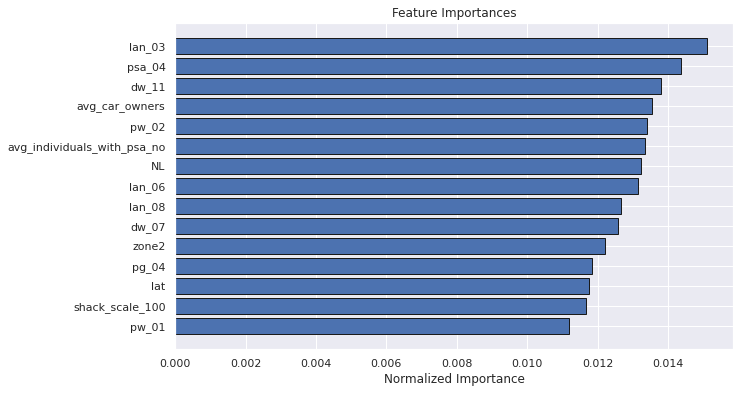

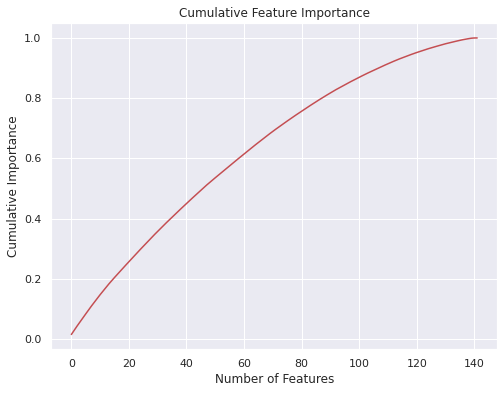

108 features required for 0.90 of cumulative importance


In [ ]:
norm_feature_importances = plot_feature_importances(feature_importances_lgb)

In [ ]:
# Initialize an empty array to hold feature importances
X = train.drop(['target','tag','ward','ADM4_PCODE'],axis=1)
y = train.target
feature_importances_cbc = np.zeros(X.shape[1])

# Create the model with several hyperparameters
model = CatBoostRegressor(bootstrap_type='MVS',
                          random_state=2019,
                          depth=5,
                          l2_leaf_reg=2.0,
                          iterations=4500.0,
                          colsample_bylevel=0.05810457490314546,
                          silent=True)
# Fit the model twice to avoid overfitting

for i in range(2):
    
    # Split into training and validation set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = i,shuffle=True)
    
    # Train using early stopping
    model.fit(X_train, y_train, early_stopping_rounds=100, eval_set = [(X_test, y_test)], verbose = 200)
    
    # Record the feature importances
    feature_importances_cbc += model.feature_importances_

# Make sure to average feature importances! 
feature_importances_cbc = feature_importances_cbc / 2
feature_importances_cbc = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances_cbc}).sort_values('importance', ascending = False)



0:	learn: 10.0899945	test: 10.0109352	best: 10.0109352 (0)	total: 49.3ms	remaining: 3m 41s
200:	learn: 3.3322227	test: 3.6536166	best: 3.6536166 (200)	total: 354ms	remaining: 7.57s
400:	learn: 2.7626412	test: 3.3428408	best: 3.3428408 (400)	total: 632ms	remaining: 6.46s
600:	learn: 2.3671790	test: 3.2085450	best: 3.2085450 (600)	total: 922ms	remaining: 5.98s
800:	learn: 2.0819196	test: 3.1493702	best: 3.1492625 (797)	total: 1.2s	remaining: 5.56s
1000:	learn: 1.8529452	test: 3.1023294	best: 3.1023294 (1000)	total: 1.51s	remaining: 5.29s
1200:	learn: 1.6729073	test: 3.0759863	best: 3.0759551 (1198)	total: 1.79s	remaining: 4.92s
1400:	learn: 1.5149548	test: 3.0635824	best: 3.0633329 (1397)	total: 2.06s	remaining: 4.57s
1600:	learn: 1.3747801	test: 3.0512974	best: 3.0512620 (1599)	total: 2.35s	remaining: 4.26s
1800:	learn: 1.2535467	test: 3.0402888	best: 3.0402316 (1798)	total: 2.63s	remaining: 3.94s
2000:	learn: 1.1490451	test: 3.0389382	best: 3.0365709 (1903)	total: 2.9s	remaining: 3.62s

In [ ]:
feature_importances_cbc.head(50)

,feature,importance
62,diff_family_psa_scale_100,5.200797
20,car_01,5.078484
59,diff_psa_scale_100,4.350237
13,psa_01,4.232203
19,car_00,4.223505
43,pw_00,3.817363
17,stv_00,3.592077
21,lln_00,3.583266
40,pg_03,3.118248
37,pg_00,3.075063


In [ ]:
# Find the features with zero importance
zero_features = list(feature_importances_cbc[feature_importances_cbc['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
#feature_importances_cbc.tail(50)

There are 0 features with 0.0 importance


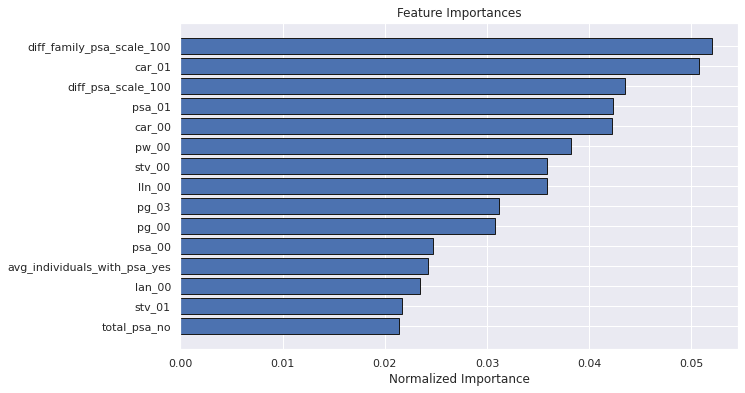

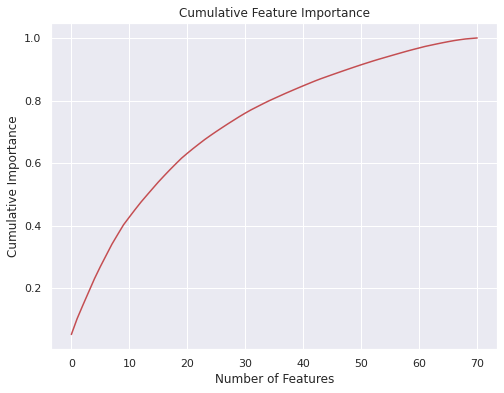

49 features required for 0.90 of cumulative importance


In [ ]:
norm_feature_importances = plot_feature_importances(feature_importances_cbc)

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 5.1 MB/s 
     |████████████████████████████████| 81 kB 7.9 MB/s 
     |████████████████████████████████| 210 kB 38.0 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 112 kB 36.6 MB/s 
     |████████████████████████████████| 146 kB 49.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=60e1962819030277562b3faa15d0139e3460cf814f99f816e77dc4bf32467427
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna

In [ ]:
X = train.drop(['target','tag'],axis=1)
y = train['target']

In [ ]:
def objective(trial):
  oof_f1 = []
  oof_predictions = []

  param={}
  param['n_estimators'] = 10000
  param['min_child_samples'] = trial.suggest_int("min_child_samples",1,32)
  param['learning_rate'] = trial.suggest_float("learning_rate", 0.01, 0.3,log=True)
  param["max_depth"] =  9
  param["min_gain_to_split"] = trial.suggest_float("min_gain_to_split", 0, 1)
  param['colsample_bytree'] = trial.suggest_float("colsample_bytree", 0.1, 1.0)


  fold= KFold(n_splits=5)
  i=1
  for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LGBMRegressor(**param,random_state=42)

    
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
    preds=model.predict(X_test)
    oof_f1.append(sqrt(mean_squared_error(y_test,preds)))

  return np.mean(oof_f1)

In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)
print(study.best_params)

[I 2022-05-15 00:41:12,983] A new study created in memory with name: no-name-46c58b81-b3c8-4efd-a5a4-02debdbc851e
[I 2022-05-15 00:41:32,582] Trial 0 finished with value: 3.7377646844327863 and parameters: {'min_child_samples': 25, 'learning_rate': 0.09775462949399265, 'min_gain_to_split': 0.0541424045213138, 'colsample_bytree': 0.6616656421639061}. Best is trial 0 with value: 3.7377646844327863.
[I 2022-05-15 00:42:22,199] Trial 1 finished with value: 3.674439390540858 and parameters: {'min_child_samples': 14, 'learning_rate': 0.02418531566815604, 'min_gain_to_split': 0.42612013599903154, 'colsample_bytree': 0.3810211143783927}. Best is trial 1 with value: 3.674439390540858.
[I 2022-05-15 00:43:37,467] Trial 2 finished with value: 3.713890938926272 and parameters: {'min_child_samples': 11, 'learning_rate': 0.03900230825298093, 'min_gain_to_split': 0.6439085152549836, 'colsample_bytree': 0.8812907841736177}. Best is trial 1 with value: 3.674439390540858.
[I 2022-05-15 00:43:40,917] Tri

In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
lgb_oof_predictions=[]


param = trial.params



fold=KFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = LGBMRegressor(**param)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
    preds=model.predict(X_test)
    print("err: ",sqrt(mean_squared_error(y_test,preds)))
    oof_f1.append(sqrt(mean_squared_error(y_test,preds)))



In [ ]:
def objective2(trial):
  oof_f1 = []
  oof_predictions = []
  param = {}
  bootstrap_type='MVS',
                              depth=5,
                              l2_leaf_reg=2.0,
                              iterations=4500.0,
                              colsample_bylevel=0.05810457490314546,
                              silent=True
  param['depth'] = trial.suggest_int('depth', 3, 15)
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 8.0, 0.5)
  param['iterations'] = trial.suggest_discrete_uniform("iterations", 1000, 30000, 1500)
  param['use_best_model'] = True
  param["colsample_bylevel"] =  trial.suggest_float("colsample_bylevel", 0.01, 0.1)

  fold= KFold(n_splits=5)
  i=1
  for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = CatBoostRegressor(**param,random_state=42)

    
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
    preds=model.predict(X_test)
    oof_f1.append(sqrt(mean_squared_error(y_test,preds)))

  return np.mean(oof_f1)

In [ ]:
study_cbc = optuna.create_study(direction="minimize")
study_cbc.optimize(objective2, n_trials=100)
print(study_cbc.best_params)

In [ ]:
print("Number of finished trials: {}".format(len(study_cbc.trials)))

print("Best trial:")
trial = study_cbc.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
oof_f1=[]
cbc_oof_predictions=[]


param_cbc = trial.params



fold=KFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X,y):
        
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = CatBoostRegressor(**param_cbc)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
    preds=model.predict(X_test)
    cbc_oof_predictions = model.predict(test)
    print("err: ",sqrt(mean_squared_error(y_test,preds)))
    oof_f1.append(sqrt(mean_squared_error(y_test,preds)))
    
print(np.mean(oof_f1))

err:  3.3631680266157264
err:  3.2829196483638503
err:  3.9965532676629754
err:  4.059418264214277
err:  3.5343452657998333
3.6472808945313324


In [ ]:
#Cross-Validation Ensemble routine

def ensemb_crossval():

    rand = 40

    fold = StratifiedKFold(n_splits= 5, shuffle= True, random_state= rand)

    i = 1

    auc_bin = []
    
    test_predictions = list()
    


    for train_index, test_index in fold.split(X_train, y_train):
        
    
        print('fold n°: ', i)

        x_data, x_val = X_train.iloc[train_index], X_train.iloc[test_index]

        y_data, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
    
        
        
        lgb_model_3.fit(x_data, y_data, categorical_feature = cat_cols, eval_set= [(x_val, y_val)],  \
                  verbose = 100, eval_metric = ['auc'], early_stopping_rounds = 100)
        
        cat_model_1.fit(x_data, y_data, cat_features = cat_cols, eval_set= [(x_val, y_val)],\
                  verbose = 100)

#         y_train_pred_lgb = lgb_model_3.predict_proba(x_data)[:, 1]
        
        y_val_pred_lgb = lgb_model_3.predict_proba(x_val)[:, 1]
        
        y_test_pred_lgb = lgb_model_3.predict_proba(X_test)[:, 1]
        
        
#         y_train_pred_cat = cat_model_1.predict_proba(x_data)[:, 1]
        
        y_val_pred_cat = cat_model_1.predict_proba(x_val)[:, 1]
        
        y_test_pred_cat = cat_model_1.predict_proba(X_test)[:, 1]
        
        
#         y_train_pred = ((1.0*(y_train_pred_lgb)) + (1.0*(y_train_pred_cat)))/2
        
        y_val_pred = ((1.0*(y_val_pred_lgb)) + (1.0*(y_val_pred_cat)))/2
        
        y_test_pred = ((1.0*(y_test_pred_lgb)) + (1.0*(y_test_pred_cat)))/2

        
        test_predictions.append(y_test_pred)    

    
#         print('auc_binary train', roc_auc_score(y_data, y_train_pred))
        print('auc_binary val',  roc_auc_score(y_val, y_val_pred))
        
    
    
        auc_bin.append(roc_auc_score(y_val, y_val_pred))



        i = i + 1
        
    print('Mean auc binary test: ', np.mean(auc_bin)) 
    print('Std auc binary test: ', np.std(auc_bin)) 
    
    
    return test_predictions,  auc_bin